# Procesamiento de datos

In [1]:
#Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('../data/credits.csv')
df2 = pd.read_csv('../data/movies_metadata.csv')
df3 = pd.read_csv('../data/keywords.csv')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\414794929.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('../data/movies_metadata.csv')


In [3]:
df1.head(3)

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602

In [4]:
df2.head(3)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   

     original_title                                           overview  ...  \
0         Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   
1           Jumanji  When siblings Judy and Peter discover an encha...  ...   
2  Grumpier Old Men  A family wedding reignites the ancient feud be...  ...   

  release_date      revenue runtime  \
0   1995-10-30  373554033.0    81.0   
1   1995-12-15  262797249.0   104.0   
2   1995-12-22          0.0   101.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline             title  video  \
0                                                NaN         Toy Story  False   
1          Roll the dice and unleash the excitement!           Jumanji  False   
2  Still Yelling. Still Fighting. Still Ready for...  Grumpier Old Men  False   

  vote_average vote_count  
0          7.7     5415.0  
1          6.9     2413.0  
2          6.5       92.0  

[3 rows x 24 columns]

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
df3.head(3)

id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...

In [7]:
#Verificar que datos de la columna 'id' no son numéricos
print((df2[pd.to_numeric(df2['id'], errors='coerce').isnull()])['id'])

19730    1997-08-20
29503    2012-09-29
35587    2014-01-01
Name: id, dtype: object


In [8]:
# Eliminar las filas que no son numéricas
date_rows = df2[df2['id'].str.match(r'^\d{4}-\d{2}-\d{2}$')]
df2 = df2.drop(date_rows.index)

In [9]:
df2['id'] = df2['id'].astype(int)

In [10]:
df2['original_language'].value_counts()

original_language
en    32269
fr     2438
it     1529
ja     1350
de     1080
      ...  
ay        1
rw        1
cy        1
tg        1
si        1
Name: count, Length: 89, dtype: int64

In [11]:
#Eliminar las filas que no están en inglés
df2 = df2[df2['original_language']=='en']
df2.shape

(32269, 24)

In [12]:
# Juntar los tres dataframes
df2 = df2.merge(df1, on='id')
df2 = df2.merge(df3, on='id')

In [13]:
df2.shape

(32937, 27)

In [14]:
df2.head(3)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   

     original_title                                           overview  ...  \
0         Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   
1           Jumanji  When siblings Judy and Peter discover an encha...  ...   
2  Grumpier Old Men  A family wedding reignites the ancient feud be...  ...   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline             title  video  \
0                                                NaN         Toy Story  False   
1          Roll the dice and unleash the excitement!           Jumanji  False   
2  Still Yelling. Still Fighting. Still Ready for...  Grumpier Old Men  False   

   vote_average  vote_count  \
0           7.7      5415.0   
1           6.9      2413.0   
2           6.5        92.0   

                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   

                                                crew  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...   

                                            keywords  
0  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...  
1  [{'id': 10090, 'name': 'board game'}, {'id': 1...  
2  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...  

[3 rows x 27 columns]

In [15]:
df2.shape

(32937, 27)

In [16]:
# Verificar si hay valores nulos
df2.isnull().sum()

adult                        0
belongs_to_collection    29777
budget                       0
genres                       0
homepage                 26619
id                           0
imdb_id                     13
original_language            0
original_title               0
overview                    72
popularity                   3
poster_path                333
production_companies         3
production_countries         3
release_date                68
revenue                      3
runtime                      9
spoken_languages             3
status                      72
tagline                  14741
title                        3
video                        3
vote_average                 3
vote_count                   3
cast                         0
crew                         0
keywords                     0
dtype: int64

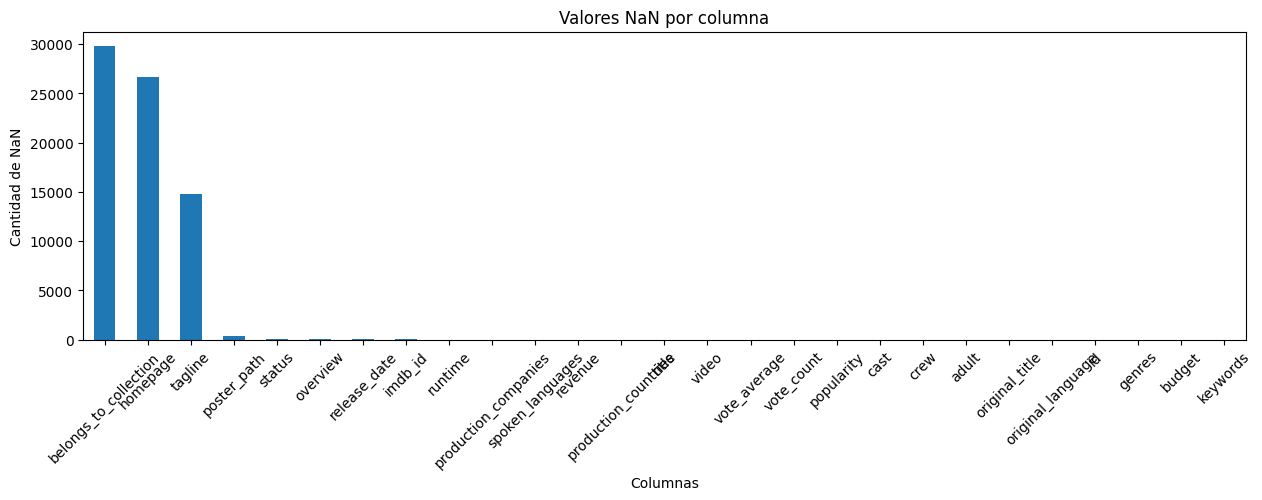

In [17]:
# Calcular y visualizar los valores NaN por columna
nan_counts = df2.isna().sum().sort_values(ascending=False)
nan_counts.plot(kind='bar', figsize=(15, 4))
plt.xlabel('Columnas')
plt.ylabel('Cantidad de NaN')
plt.title('Valores NaN por columna')
plt.xticks(rotation=45)
plt.show()

In [18]:
df2 = df2.dropna(subset=['budget','revenue', 'poster_path', 'genres'], axis=0)
df2.shape

(32604, 27)

In [19]:
df2 = df2[(df2[['budget','revenue', 'poster_path', 'genres']] != 0).all(axis=1)]
df2.shape

(6427, 27)

In [20]:
df2.head(3)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
3  False                                                NaN  16000000   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
3                                   NaN  31357  tt0114885                en   

      original_title                                           overview  ...  \
0          Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   
1            Jumanji  When siblings Judy and Peter discover an encha...  ...   
3  Waiting to Exhale  Cheated on, mistreated and stepped on, the wom...  ...   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
3           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline              title  \
0                                                NaN          Toy Story   
1          Roll the dice and unleash the excitement!            Jumanji   
3  Friends are the people who let you be yourself...  Waiting to Exhale   

   video  vote_average  vote_count  \
0  False           7.7      5415.0   
1  False           6.9      2413.0   
3  False           6.1        34.0   

                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   

                                                crew  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   
3  [{'credit_id': '52fe44779251416c91011acb', 'de...   

                                            keywords  
0  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...  
1  [{'id': 10090, 'name': 'board game'}, {'id': 1...  
3  [{'id': 818, 'name': 'based on novel'}, {'id':...  

[3 rows x 27 columns]

In [21]:
C = df2['vote_average'].mean()
C

6.175867434261709

In [22]:
m = df2['vote_count'].quantile(0.9)
m

1639.2000000000016

In [23]:
df2.to_csv("../data/dataset.csv", index=False)

In [24]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(643, 27)

In [25]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [26]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [27]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

title  vote_count  \
280                         The Shawshank Redemption      8358.0   
10286                                The Dark Knight     12269.0   
734                                    The Godfather      6024.0   
2558                                      Fight Club      9678.0   
265                                     Pulp Fiction      8670.0   
12457                                      Inception     14075.0   
315                                     Forrest Gump      8147.0   
17706                                   Interstellar     11187.0   
6136   The Lord of the Rings: The Return of the King      8226.0   
1019                         The Empire Strikes Back      5998.0   

       vote_average     score  
280             8.5  8.118921  
10286           8.3  8.049653  
734             8.5  8.002855  
2558            8.3  7.992337  
265             8.3  7.962255  
12457           8.1  7.899287  
315             8.2  7.860955  
17706           8.1  7.854094  
6136            8.1  7.780286  
1019            8.2  7.765553

In [28]:
palette = sns.color_palette("husl", len(q_movies.head(50)))

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\1596209010.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='title', y='score', data=q_movies.head(50), palette=palette)


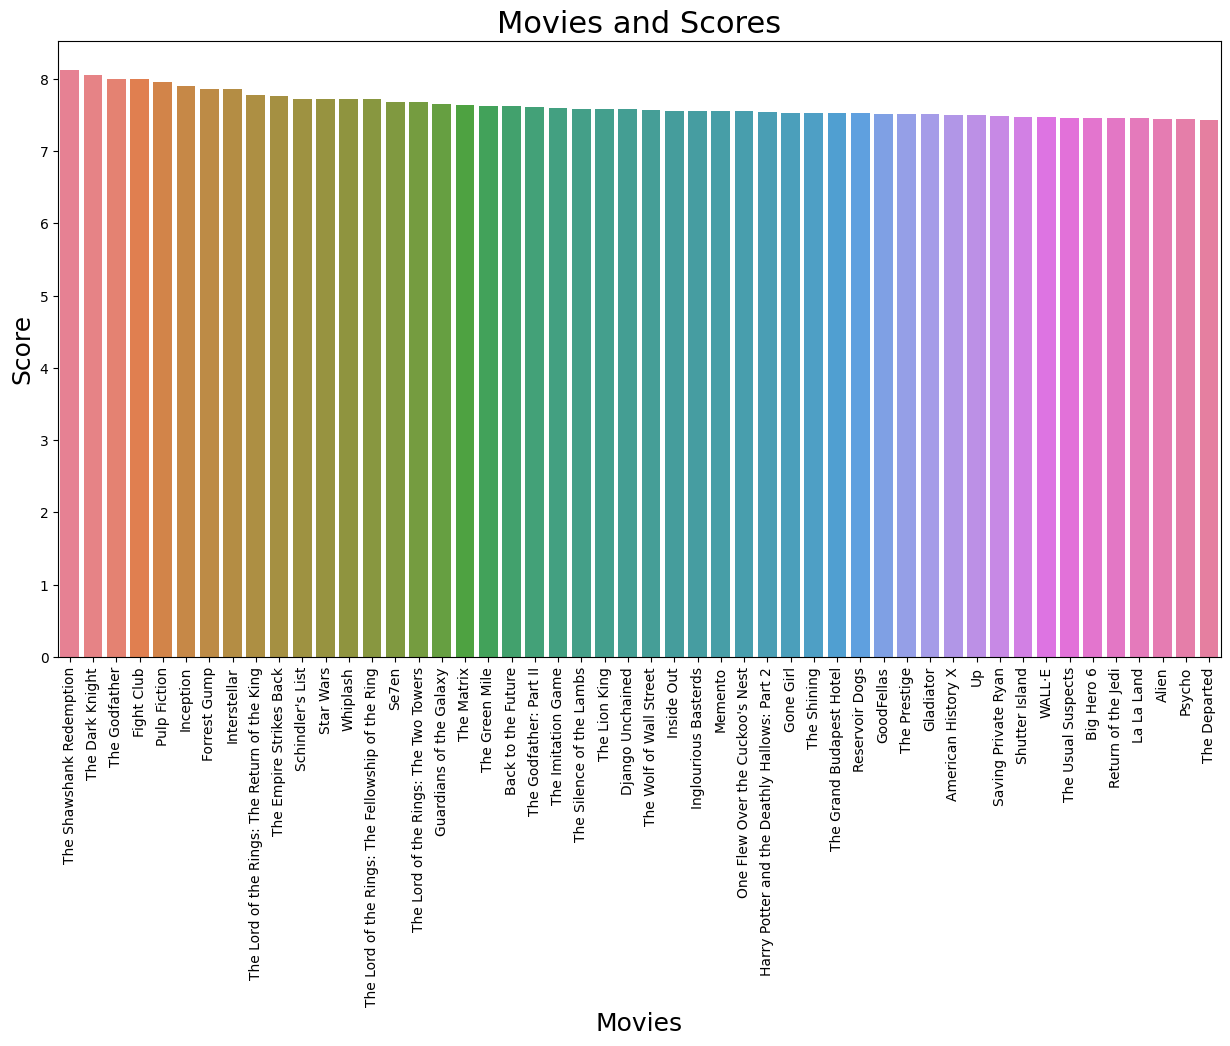

In [29]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
g = sns.barplot(x='title', y='score', data=q_movies.head(50), palette=palette)
g.set_title("Movies and Scores", fontsize=22)
g.set_xlabel("Movies", fontsize=18)
g.set_ylabel('Score', fontsize=18)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\1434464177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.barplot(x='title', y='score',  data=q_movies.head(50), palette=palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\1434464177.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 70)` for the same effect.

  gt = sns.pointplot(x='title', y='runtime', data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\1434464177.py:6: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line

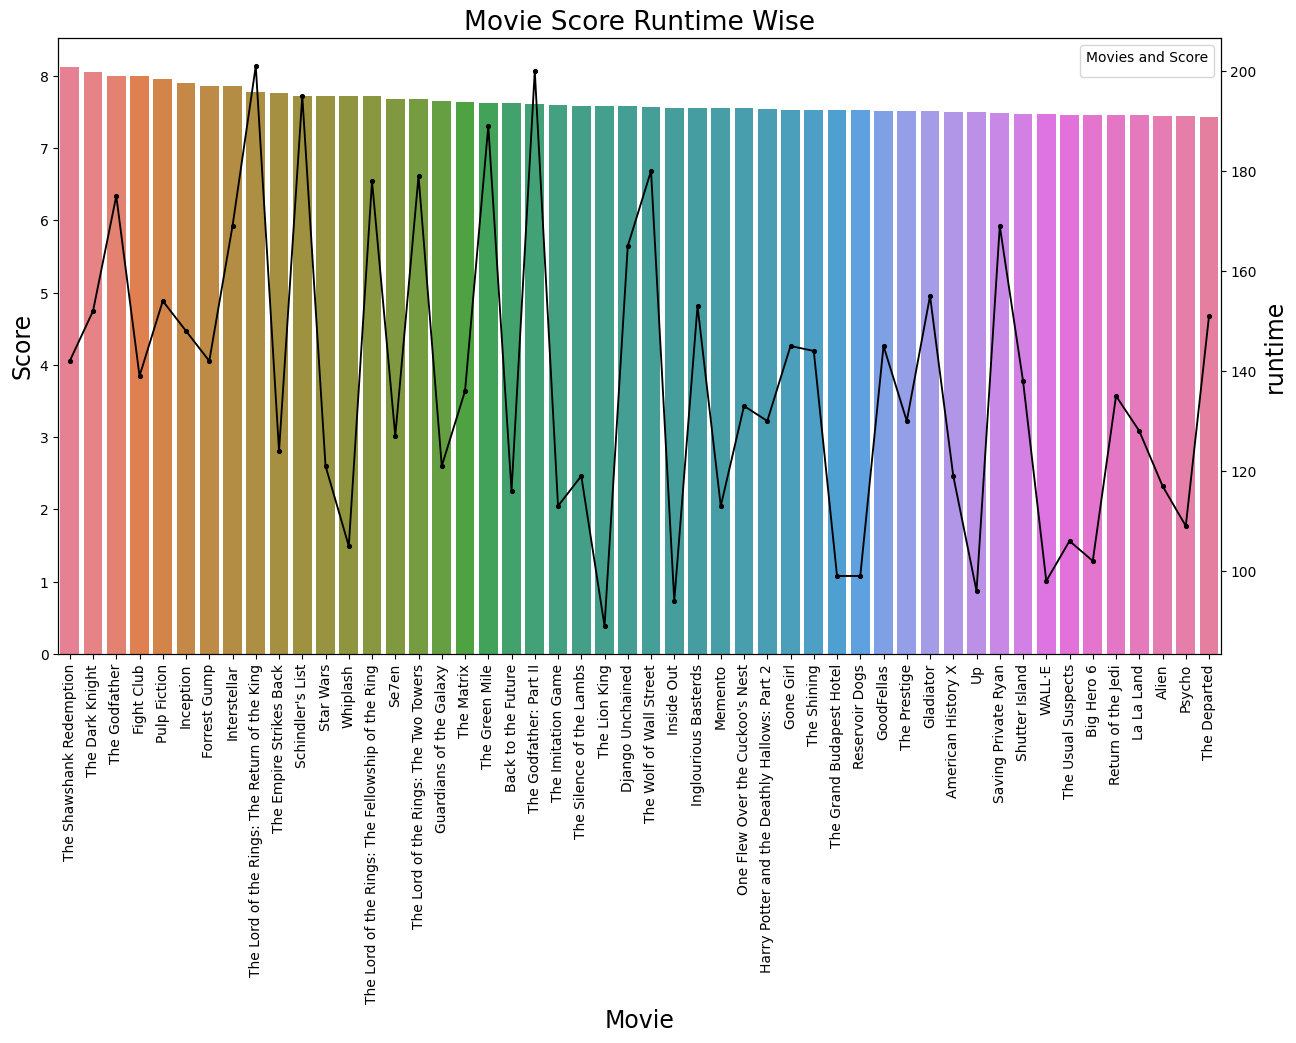

In [30]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
g1 = sns.barplot(x='title', y='score',  data=q_movies.head(50), palette=palette)
plt.legend(title='Movies and Score', loc='best')
gt = g1.twinx()
gt = sns.pointplot(x='title', y='runtime', data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
gt.set_ylabel("runtime", fontsize=17)
g1.set_title("Movie Score Runtime Wise", fontsize=19)
g1.set_xlabel("Movie", fontsize=17)
g1.set_ylabel("Score", fontsize=17)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\3191374929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.barplot(x='title', y='score',  data=q_movies.head(50), palette=palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\3191374929.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 70)` for the same effect.

  gt = sns.pointplot(x='title', y=q_movies['budget'].astype(float), data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\3191374929.py:6: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element

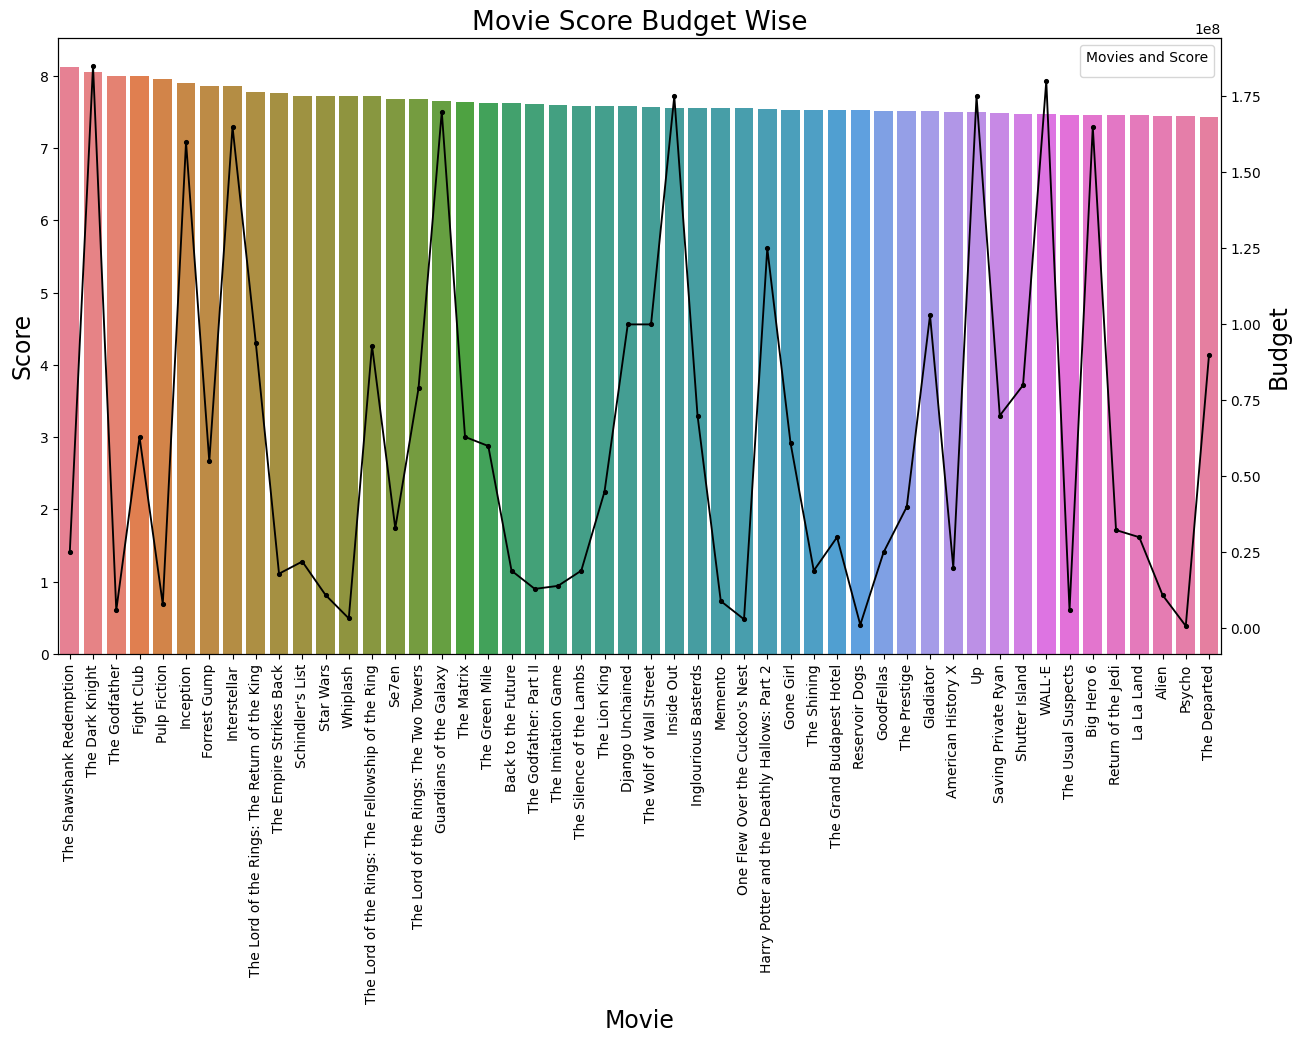

In [31]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
g1 = sns.barplot(x='title', y='score',  data=q_movies.head(50), palette=palette)
plt.legend(title='Movies and Score', loc='best')
gt = g1.twinx()
gt = sns.pointplot(x='title', y=q_movies['budget'].astype(float), data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
gt.set_ylabel("Budget", fontsize=17)
g1.set_title("Movie Score Budget Wise", fontsize=19)
g1.set_xlabel("Movie", fontsize=17)
g1.set_ylabel("Score", fontsize=17)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\2568885125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.barplot(x='title', y='score',  data=q_movies.head(50), palette=palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\2568885125.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 70)` for the same effect.

  gt = sns.pointplot(x='title', y=q_movies['revenue'].astype(float), data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\2568885125.py:6: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot elemen

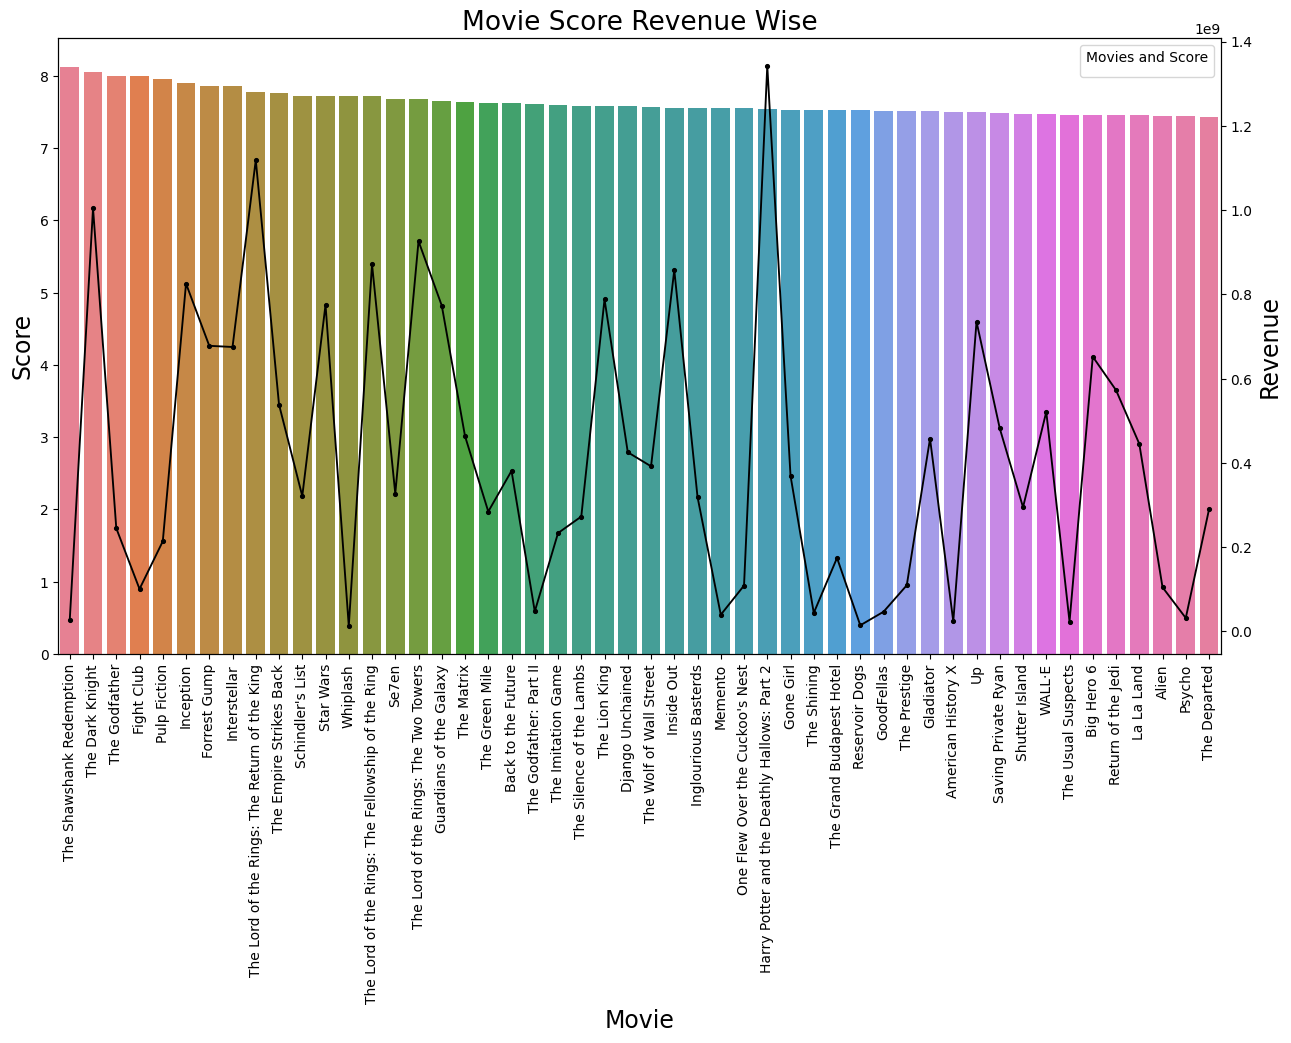

In [32]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
g1 = sns.barplot(x='title', y='score',  data=q_movies.head(50), palette=palette)
plt.legend(title='Movies and Score', loc='best')
gt = g1.twinx()
gt = sns.pointplot(x='title', y=q_movies['revenue'].astype(float), data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
gt.set_ylabel("Revenue", fontsize=17)
g1.set_title("Movie Score Revenue Wise", fontsize=19)
g1.set_xlabel("Movie", fontsize=17)
g1.set_ylabel("Score", fontsize=17)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\520007549.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 70)` for the same effect.

  gt = sns.pointplot(x='title', y=q_movies['budget'].astype(float), data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_25692\520007549.py:6: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  gt = sns.pointplot(x='title', y=q_movies['budget'].astype(float), data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)


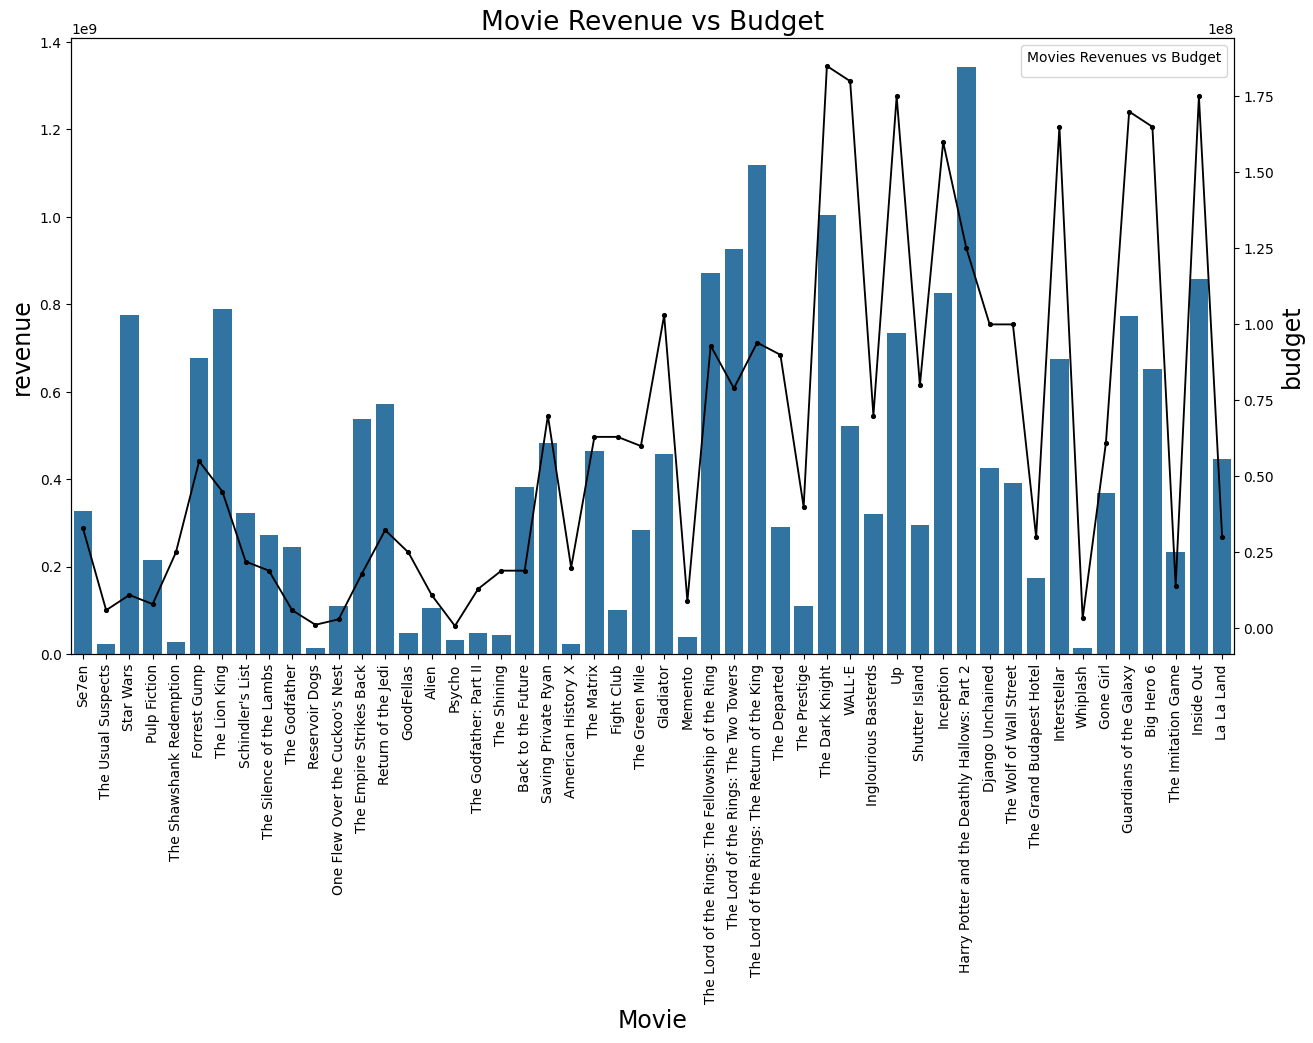

In [33]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
g1 = sns.barplot(x='title', y=q_movies['revenue'].astype(float),  data=q_movies.head(50))
plt.legend(title='Movies Revenues vs Budget', loc='best')
gt = g1.twinx()
gt = sns.pointplot(x='title', y=q_movies['budget'].astype(float), data=q_movies.head(50), color='black', legend=False, ci=70, scale=0.5)
gt.set_ylabel("budget", fontsize=17)
g1.set_title("Movie Revenue vs Budget", fontsize=19)
g1.set_xlabel("Movie", fontsize=17)
g1.set_ylabel("revenue", fontsize=17)
plt.show()

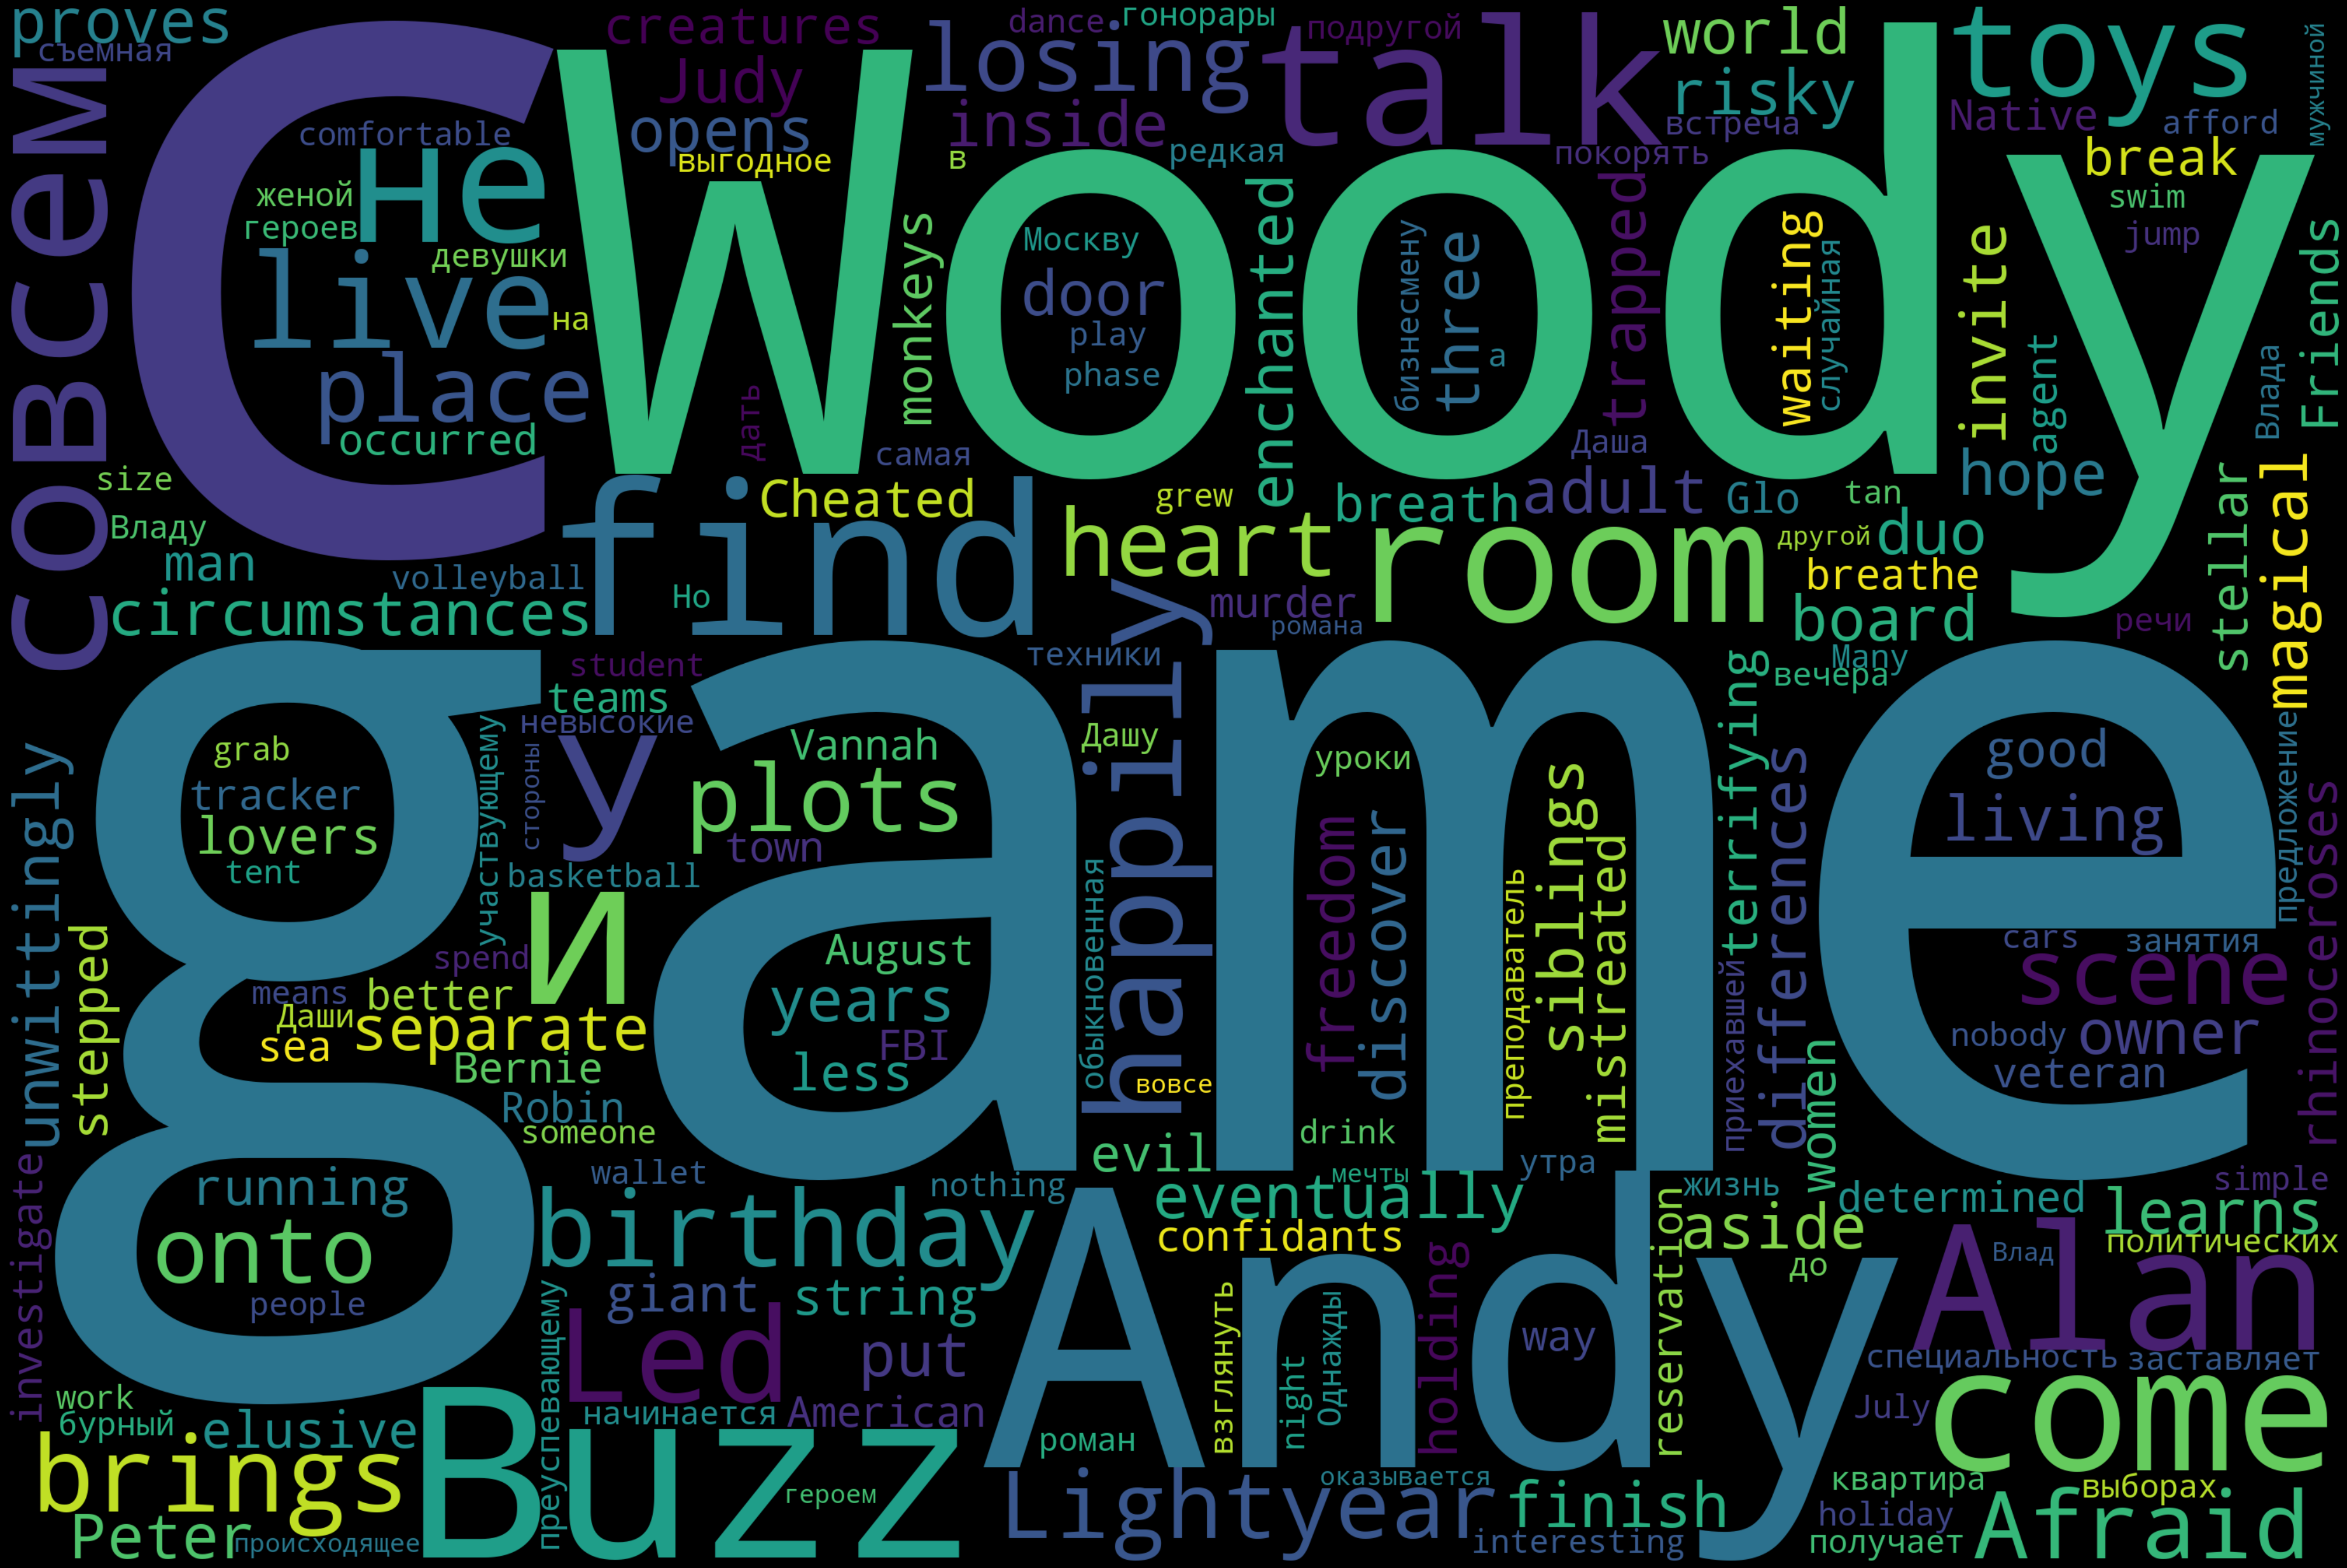

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df2.overview.values
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [35]:
df2['overview']

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
5        Obsessive master thief, Neil McCauley leads a ...
                               ...                        
32712    In the summer of 1993, timid and shy Zhou Xiao...
32754    Gene, a multi-expressional emoji, sets out on ...
32774    An FBI agent teams with the town's veteran gam...
32898    The sea, August, interesting and simple people...
32900    У девушки Даши, приехавшей с подругой «покорят...
Name: overview, Length: 6427, dtype: object